<a href="https://colab.research.google.com/github/AbelReyes2002/aprendizaje-automatico-252601/blob/main/4_4_M%C3%A9todos_de_clustering_basados_en_particiones_V3_ERIK_REYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids

# 🔧 **CONFIGURACIÓN INICIAL.**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [41]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


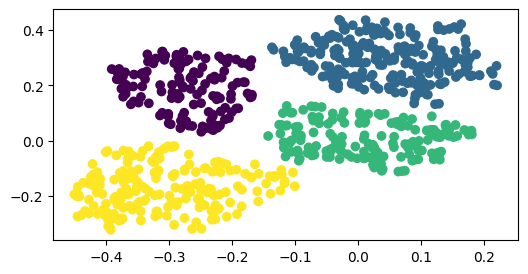

In [42]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [43]:
# PASO 1 elejir los medoides iniciales de forma randomica
def paso1_elije_medoides(K, Dx):
  # Elegimos los centros iniciales entre el conjunto de datos
  cDx = Dx[np.random.choice(Dx.shape[0], K, replace=False),:]## P1. Tu código aquí ##
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[ 0.0390144  0.273065 ]
 [-0.355802   0.238831 ]
 [-0.379659  -0.281861 ]
 [-0.419882  -0.235133 ]]


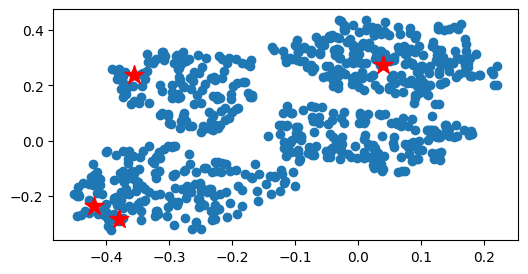

In [44]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [45]:
# Definimos la distancia euclidiana de una instancia x
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i,:], cDx)## P2. Tu código aquí ##

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

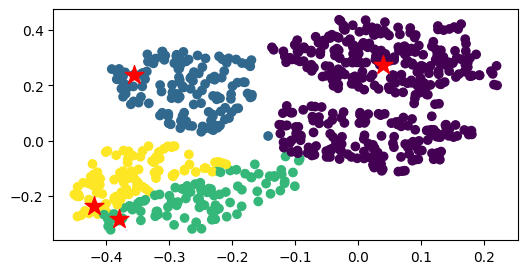

In [46]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [47]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # En este caso lo que buscamos es el elemento del cluster que reduce la
      # distancia con respecto a todos los demás elementos. Para ello, calculamos
      # las distancias entre todos los elementos del cluster `k` y las almacenamos
      # en `mat`.

      # P3: índices de los elementos que pertenecen al cluster k
      indices_elementos_k = np.where(Dyp == k)[0]

      # Si el cluster está vacío, no se actualiza
      if len(indices_elementos_k) == 0:
          continue

      # P4: matriz de distancias entre los elementos del cluster k
      mat = matriz_distancias(Dx[indices_elementos_k], distancia_euclidiana)

      # Ahora buscamos el elemento con menor distancia dentro del
      # cluster `k` y nos quedamos con su índice
      ic = np.where(Dyp == k)[0][np.argmin(np.sum(mat, axis=1))]

      # P5: asignamos como nuevo centro el elemento del cluster
      cDx[k, :] = Dx[ic, :]

  return cDx


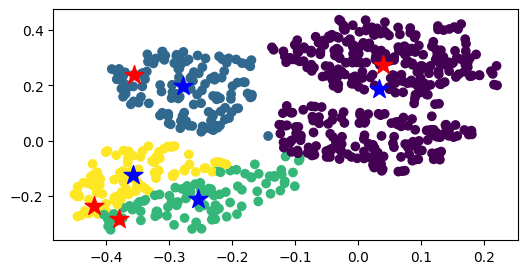

In [48]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [49]:
def MyKMedoide(Dx, K):
  cDx =  paso1_elije_medoides(K, Dx)## P6. Tu código aquí ##
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)## P7. Tu código aquí ##
    # Calcular los nuevos centros
    cDx =  paso3_actualiza_medoides(Dx, cDx, Dyp, K)## P8. Tu código aquí ##
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

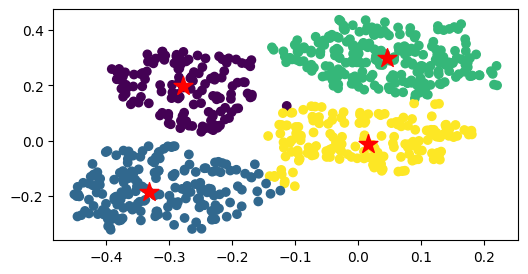

In [50]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


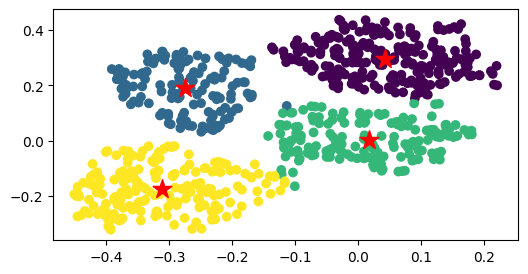

In [51]:
from sklearn.cluster import KMeans

modelo = KMeans(4)
modelo.fit(Dx)
modelo.predict(Dx)
Dyp_sk = modelo.labels_## P9.1 Tu código aquí ##
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_## P9.2 Tu código aquí ##

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [52]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [55]:
## P10. Tu código aquí ##
# K-medoids
sil_kmed = silhouette_score(Dx, Dyp)
ch_kmed  = calinski_harabasz_score(Dx, Dyp)

# K-means++
sil_kmeans = silhouette_score(Dx, Dyp_sk)
ch_kmeans  = calinski_harabasz_score(Dx, Dyp_sk)

print('K-MEDOIDS')
print('Silueta:', sil_kmed)
print('Calinski-Harabasz:', ch_kmed)

print('\nK-MEANS++')
print('Silueta:', sil_kmeans)
print('Calinski-Harabasz:', ch_kmeans)

K-MEDOIDS
Silueta: 0.536069406534725
Calinski-Harabasz: 1342.421658701296

K-MEANS++
Silueta: 0.5361642035334295
Calinski-Harabasz: 1346.0006263112991


**Conclusion**

Los resultados obtenidos muestran que ambos algoritmos presentan un desempeño muy similar en la calidad del agrupamiento. Sin embargo, K-means++ obtiene valores ligeramente superiores tanto en el coeficiente de silueta como en el índice de Calinski–Harabasz, lo que indica una mejor separación y compactación de los clústeres para este conjunto de datos.

Por lo tanto, aunque K-medoids es más robusto frente a valores atípicos, K-means++ resulta marginalmente mejor en términos de calidad de agrupamiento según las métricas evaluadas.



### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


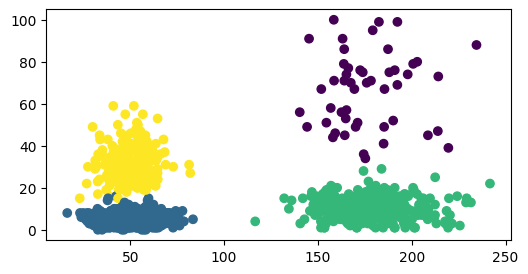

In [60]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

Text(0.5, 1.0, 'K-means++')

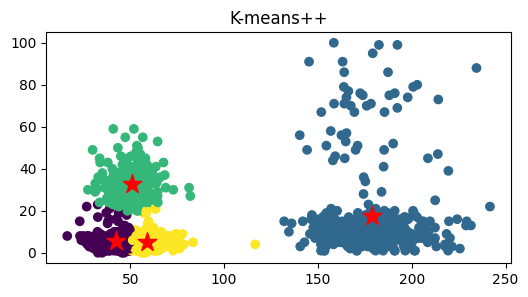

In [61]:
 ## aplica kMeans ++
 ## P11. Tu código aquí ##
from sklearn.cluster import KMeans

K = 4

# K-means++
modelo = KMeans(K)
modelo.fit(Dx)

Dyp_sk = modelo.labels_
cDx_sk = modelo.cluster_centers_

fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0], cDx_sk[:,1], marker='*', s=200, c='r')
ax.set_title('K-means++')


Text(0.5, 1.0, 'K-medoids')

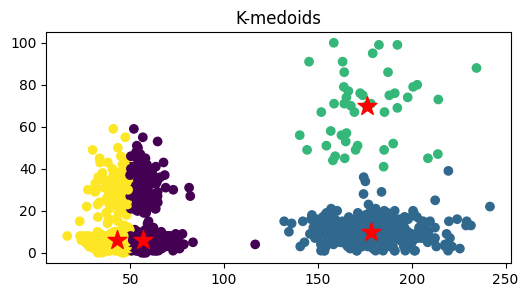

In [62]:
 ## aplica kMedoide
 ## P12. Tu código aquí ##
cDx_kmed, Dyp_kmed = MyKMedoide(Dx, K)

fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_kmed)
ax.scatter(cDx_kmed[:,0], cDx_kmed[:,1], marker='*', s=200, c='r')
ax.set_title('K-medoids')


In [63]:
# K-medoids
sil_kmed = silhouette_score(Dx, Dyp_kmed)
ch_kmed  = calinski_harabasz_score(Dx, Dyp_kmed)

# K-means++
sil_kmeans = silhouette_score(Dx, Dyp_sk)
ch_kmeans  = calinski_harabasz_score(Dx, Dyp_sk)

print('K-MEDOIDS')
print('Silueta:', sil_kmed)
print('Calinski-Harabasz:', ch_kmed)

print('\nK-MEANS++')
print('Silueta:', sil_kmeans)
print('Calinski-Harabasz:', ch_kmeans)

K-MEDOIDS
Silueta: 0.43083602046901887
Calinski-Harabasz: 9832.062314949653

K-MEANS++
Silueta: 0.5405574712448522
Calinski-Harabasz: 9357.37461191274


**Conclusion**

Los resultados muestran diferencias claras entre ambos algoritmos. K-means++ obtiene un mayor coeficiente de silueta, lo que indica una mejor separación entre los clústeres. Sin embargo, K-medoids presenta un índice de Calinski–Harabasz más alto, lo que refleja mayor compactación interna de los clústeres.

En conjunto, si se prioriza la separación entre clústeres, K-means++ agrupa mejor los datos; mientras que, si se valora la compactación interna y la robustez, K-medoids resulta más adecuado. Por lo tanto, la elección del algoritmo depende del criterio de evaluación considerado.

# 🚀 ¡TALLER FINALIZADO!"